In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel(r"C:\Users\91834\Downloads\archive (9)\walmart Retail Data.xlsx")
df.head()

,City,Customer Age,Customer Name,Customer Segment,Discount,Number of Records,Order Date,Order ID,Order Priority,Order Quantity,...,Profit,Region,Row ID,Sales,Ship Date,Ship Mode,Shipping Cost,State,Unit Price,Zip Code
0,McKeesport,NaN,Jessica Myrick,Small Business,0.10,1,2012-01-01,28774,High,32,...,-111.80,East,4031,180.36,2012-01-02,Regular Air,4.69,Pennsylvania,5.98,15131
1,Bowie,NaN,Matt Collister,Home Office,0.08,1,2012-01-01,13729,Not Specified,9,...,-342.91,East,1914,872.48,2012-01-03,Express Air,35.00,Maryland,95.99,20715
2,Napa,NaN,Alan Schoenberger,Corporate,0.00,1,2012-01-02,37537,Low,4,...,-193.08,West,5272,1239.06,2012-01-02,Delivery Truck,48.80,California,291.73,94559
3,Montebello,NaN,Elizabeth Moffitt,Consumer,0.08,1,2012-01-02,44069,Critical,43,...,247.79,West,6225,614.80,2012-01-02,Regular Air,1.97,California,15.04,90640
4,Napa,NaN,Alan Schoenberger,Corporate,0.07,1,2012-01-02,37537,Low,43,...,-1049.85,West,5273,4083.19,2012-01-04,Delivery Truck,45.00,California,100.98,94559


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   City                  8399 non-null   object        
 1   Customer Age          7496 non-null   float64       
 2   Customer Name         8399 non-null   object        
 3   Customer Segment      8399 non-null   object        
 4   Discount              8399 non-null   float64       
 5   Number of Records     8399 non-null   int64         
 6   Order Date            8399 non-null   datetime64[ns]
 7   Order ID              8399 non-null   int64         
 8   Order Priority        8399 non-null   object        
 9   Order Quantity        8399 non-null   int64         
 10  Product Base Margin   8336 non-null   float64       
 11  Product Category      8399 non-null   object        
 12  Product Container     8399 non-null   object        
 13  Product Name      

<AxesSubplot:>

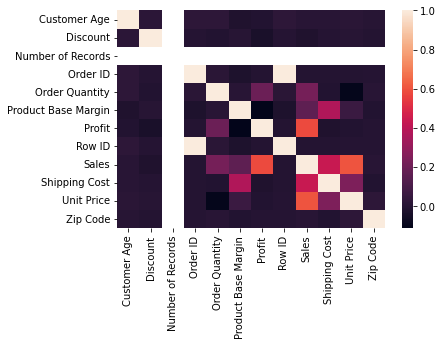

In [4]:
sns.heatmap(df.corr())

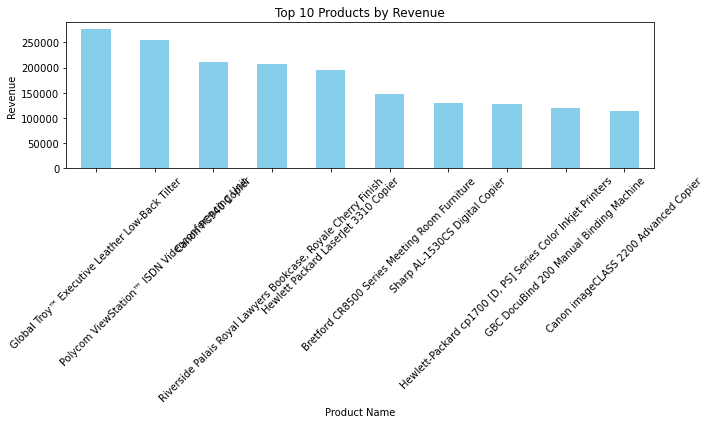

In [5]:
import matplotlib.pyplot as plt

# Calculate revenue per product
df['Revenue'] = df['Sales']  # Assuming 'Sales' is the revenue
product_revenue = df.groupby('Product Name')['Revenue'].sum().sort_values(ascending=False).head(10)

# Bar chart
plt.figure(figsize=(10, 6))
product_revenue.plot(kind='bar', color='skyblue')
plt.title("Top 10 Products by Revenue")
plt.xlabel("Product Name")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


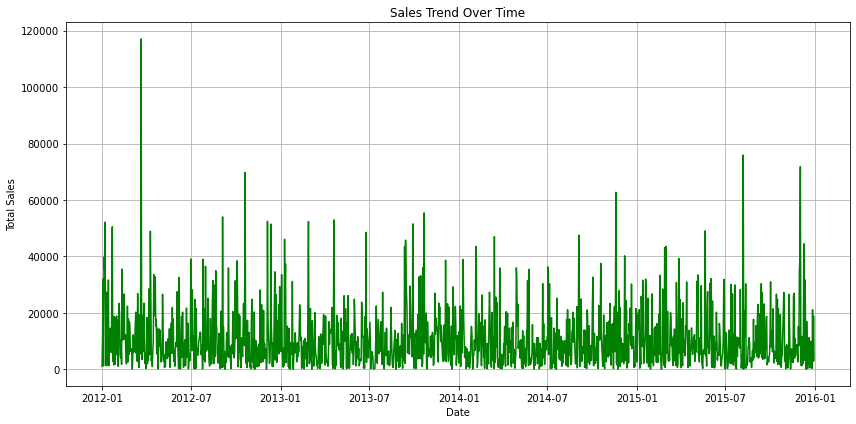

In [6]:
# Ensure 'Order Date' is in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Aggregate sales by date
sales_trend = df.groupby('Order Date')['Sales'].sum()

# Line chart
plt.figure(figsize=(12, 6))
plt.plot(sales_trend.index, sales_trend.values, color='green')
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.show()


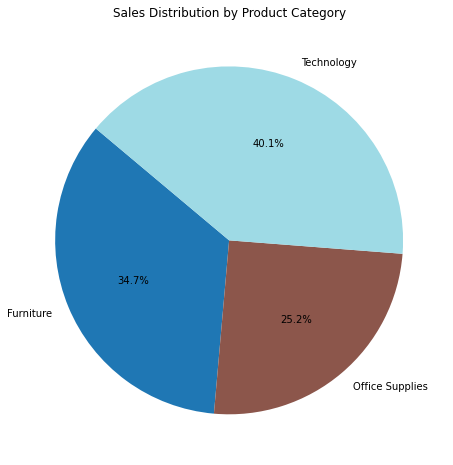

In [7]:
# Aggregate sales by product category
category_sales = df.groupby('Product Category')['Sales'].sum()

# Pie chart
plt.figure(figsize=(8, 8))
category_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='tab20')
plt.title("Sales Distribution by Product Category")
plt.ylabel("")  # Remove the default ylabel
plt.show()


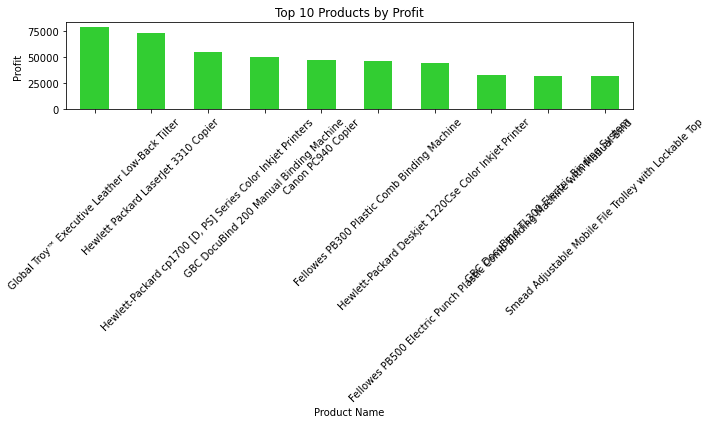

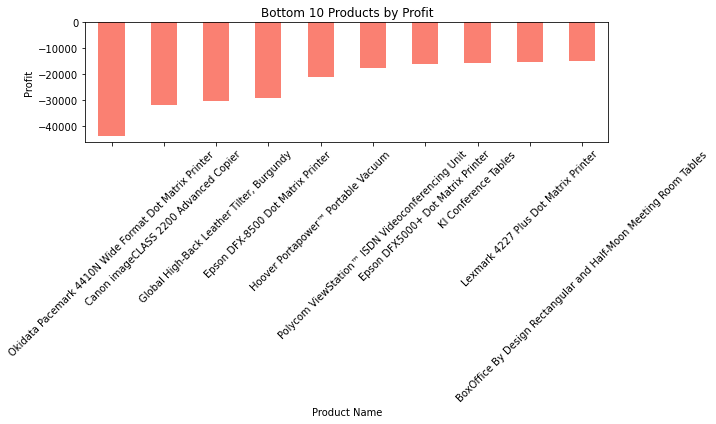

In [8]:
# Top 10 and Bottom 10 Products by Profit
top_products = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)
bottom_products = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=True).head(10)

# Bar chart for top products
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='limegreen')
plt.title("Top 10 Products by Profit")
plt.xlabel("Product Name")
plt.ylabel("Profit")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar chart for bottom products
plt.figure(figsize=(10, 6))
bottom_products.plot(kind='bar', color='salmon')
plt.title("Bottom 10 Products by Profit")
plt.xlabel("Product Name")
plt.ylabel("Profit")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


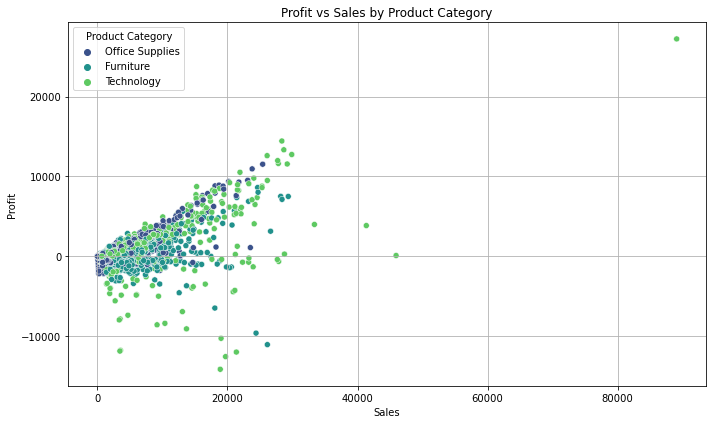

In [9]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Product Category', palette='viridis')
plt.title("Profit vs Sales by Product Category")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.grid(True)
plt.tight_layout()
plt.show()


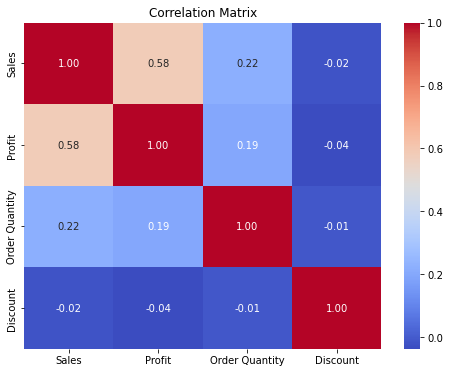

In [10]:
import seaborn as sns

# Correlation matrix
correlation_matrix = df[['Sales', 'Profit', 'Order Quantity', 'Discount']].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


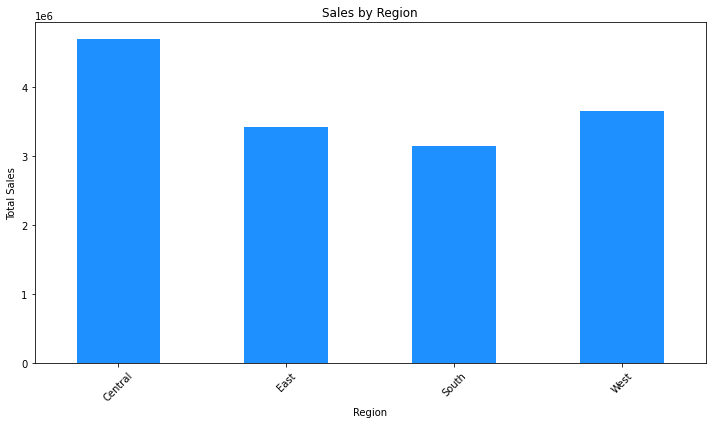

In [11]:
# Aggregate sales by region
region_sales = df.groupby('Region')['Sales'].sum()

# Bar chart
plt.figure(figsize=(10, 6))
region_sales.plot(kind='bar', color='dodgerblue')
plt.title("Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


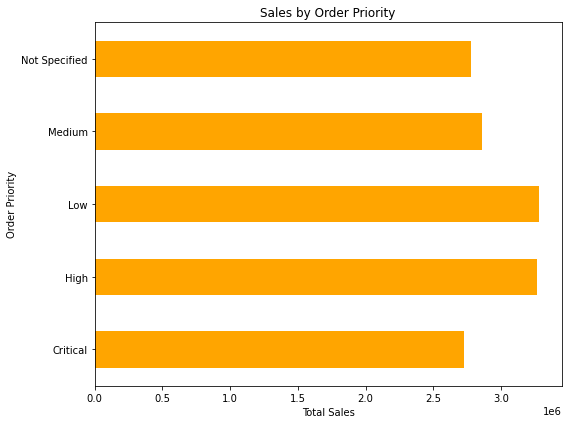

In [12]:
priority_sales = df.groupby('Order Priority')['Sales'].sum()

# Horizontal bar chart
plt.figure(figsize=(8, 6))
priority_sales.plot(kind='barh', color='orange')
plt.title("Sales by Order Priority")
plt.xlabel("Total Sales")
plt.ylabel("Order Priority")
plt.tight_layout()
plt.show()


In [13]:
df.drop(['City','Customer Age','Customer Name','Customer Segment','Discount','Number of Records','Order ID','Order Priority','Order Quantity','Product Base Margin','Product Category','Product Container','Product Name','Product Sub-Category','Profit','Region','Row ID','Ship Date','Ship Mode','Shipping Cost','State','Unit Price','Zip Code'],axis=1,inplace=True)

In [14]:
df.head()

,Order Date,Sales,Revenue
0,2012-01-01,180.36,180.36
1,2012-01-01,872.48,872.48
2,2012-01-02,1239.06,1239.06
3,2012-01-02,614.80,614.80
4,2012-01-02,4083.19,4083.19


In [15]:
df.describe()

,Sales,Revenue
count,8399.000000,8399.000000
mean,1775.878179,1775.878179
std,3585.050525,3585.050525
min,2.240000,2.240000
25%,143.195000,143.195000
50%,449.420000,449.420000
75%,1709.320000,1709.320000
max,89061.050000,89061.050000


In [16]:
df.isnull().sum()

Order Date    0
Sales         0
Revenue       0
dtype: int64

In [17]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [18]:
df.to_csv('modified_dataset.csv', index=False)  # Save to CSV without the index

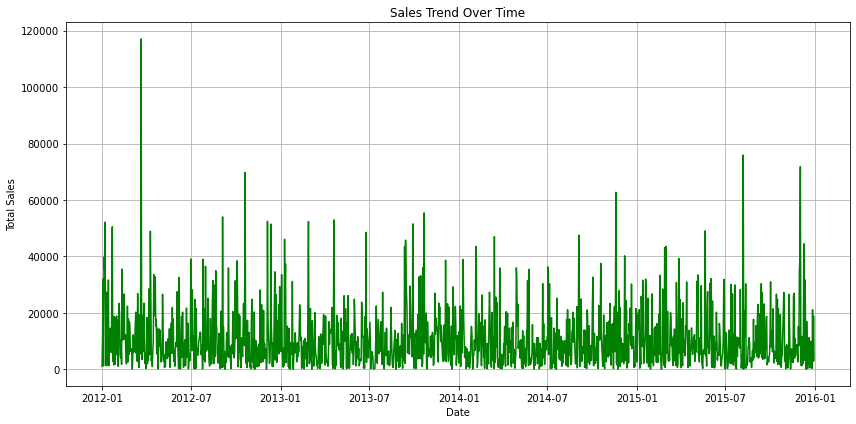

In [19]:
# Ensure 'Order Date' is in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Aggregate sales by date
sales_trend = df.groupby('Order Date')['Sales'].sum()

# Line chart
plt.figure(figsize=(12, 6))
plt.plot(sales_trend.index, sales_trend.values, color='green')
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.show()


In [20]:
from scipy.stats import zscore

# Calculate Z-scores
df['Z-Score'] = zscore(df['Sales'])

# Identify outliers (threshold: |Z-Score| > 3)
outliers_zscore = df[np.abs(df['Z-Score']) > 3]
print("\nOutliers Detected (Z-Score Method):")
print(outliers_zscore)

print("\nNumber of Outliers (Z-Score Method):", len(outliers_zscore))



Outliers Detected (Z-Score Method):
     Order Date     Sales   Revenue    Z-Score
17   2012-01-03  28359.40  28359.40   7.415545
21   2012-01-05  12635.75  12635.75   3.029391
37   2012-01-06  26133.39  26133.39   6.794594
52   2012-01-07  45923.76  45923.76  12.315171
61   2012-01-08  21752.01  21752.01   5.572396
...         ...       ...       ...        ...
8291 2015-12-09  16743.76  16743.76   4.175331
8317 2015-12-12  24391.16  24391.16   6.308594
8327 2015-12-15  16002.29  16002.29   3.968496
8382 2015-12-27  15337.58  15337.58   3.783073
8386 2015-12-29  12690.33  12690.33   3.044616

[208 rows x 4 columns]

Number of Outliers (Z-Score Method): 208


In [21]:
# Calculate IQR
Q1 = df['Sales'].quantile(0.25)  
Q3 = df['Sales'].quantile(0.75)  
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_iqr = df[(df['Sales'] < lower_bound) | (df['Sales'] > upper_bound)]
print("\nOutliers Detected (IQR Method):")
print(outliers_iqr)


print("\nNumber of Outliers (IQR Method):", len(outliers_iqr))



Outliers Detected (IQR Method):
     Order Date     Sales   Revenue   Z-Score
4    2012-01-02   4083.19   4083.19  0.643631
7    2012-01-02   4902.38   4902.38  0.872146
17   2012-01-03  28359.40  28359.40  7.415545
21   2012-01-05  12635.75  12635.75  3.029391
26   2012-01-05   8958.46   8958.46  2.003601
...         ...       ...       ...       ...
8362 2015-12-23   4547.90   4547.90  0.773263
8364 2015-12-24   7110.24   7110.24  1.488035
8372 2015-12-25   4852.05   4852.05  0.858106
8382 2015-12-27  15337.58  15337.58  3.783073
8386 2015-12-29  12690.33  12690.33  3.044616

[1042 rows x 4 columns]

Number of Outliers (IQR Method): 1042


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


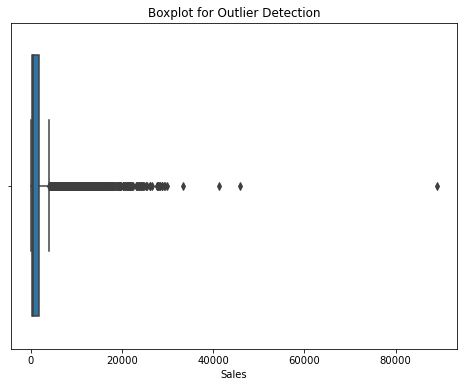

In [22]:
# Boxplot for visualizing outliers
plt.figure(figsize=(8, 6))
sns.boxplot(df['Sales'])
plt.title("Boxplot for Outlier Detection")
plt.show()

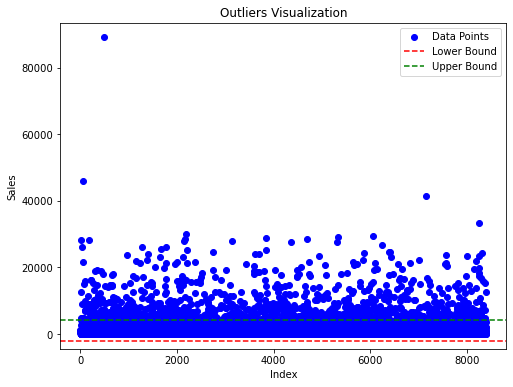

In [23]:
# Scatter plot to visualize potential outliers
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['Sales'], color='blue', label='Data Points')
plt.axhline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axhline(upper_bound, color='green', linestyle='--', label='Upper Bound')
plt.legend()
plt.title("Outliers Visualization")
plt.xlabel("Index")
plt.ylabel("Sales")
plt.show()


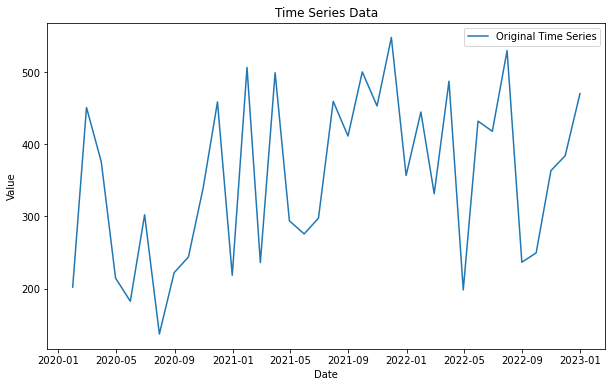

ADF Statistic: -5.5811063847773275
p-value: 1.3959838152486462e-06
The data is stationary.


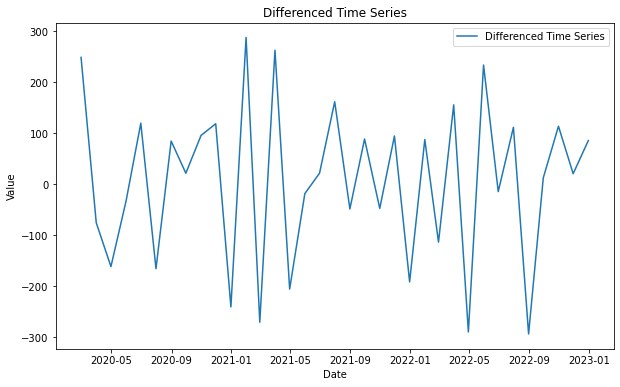

ADF Statistic: -12.534633591052245
p-value: 2.3866800693624533e-23
The data is stationary.
Using max_lags_acf = 16, max_lags_pacf = 16 based on data size.


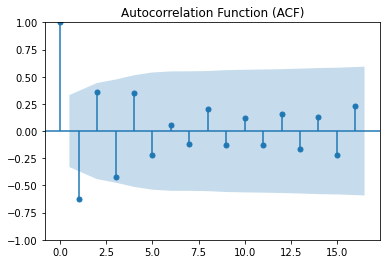

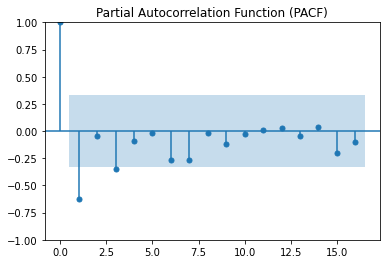

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                   36
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -216.216
Date:                Fri, 10 Jan 2025   AIC                            438.432
Time:                        19:41:40   BIC                            443.098
Sample:                    01-31-2020   HQIC                           440.043
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1750      0.211     -0.831      0.406      -0.588       0.238
ma.L1         -0.7634      0.167     -4.559      0.000      -1.092      -0.435
sigma2      1.314e+04   4487.780      2.928      0.0

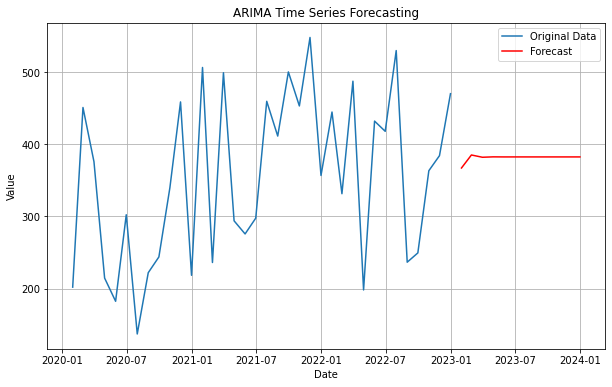

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Generate or Load Time Series Data
# Example: Simulated dataset (replace with your actual dataset)
np.random.seed(42)
date_rng = pd.date_range(start='2020-01-01', end='2022-12-31', freq='M')
data = pd.DataFrame(date_rng, columns=['Date'])
data['Value'] = np.random.randint(100, 500, size=(len(date_rng))) + np.linspace(0, 100, len(date_rng))
data.set_index('Date', inplace=True)

# Plot the original time series
plt.figure(figsize=(10, 6))
plt.plot(data, label='Original Time Series')
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Step 1: Check Stationarity
def check_stationarity(ts):
    result = adfuller(ts)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] <= 0.05:
        print("The data is stationary.")
    else:
        print("The data is not stationary.")

check_stationarity(data['Value'])

# Step 2: Differencing to Make the Data Stationary (if needed)
data_diff = data['Value'].diff().dropna()

plt.figure(figsize=(10, 6))
plt.plot(data_diff, label='Differenced Time Series')
plt.title('Differenced Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Recheck stationarity after differencing
check_stationarity(data_diff)

# Step 3: Plot ACF and PACF for Model Order Selection
# Dynamically set max lags
max_lags_acf = min(len(data_diff) // 2 - 1, 20)  # ACF maximum lags
max_lags_pacf = min(len(data_diff) // 2 - 1, 20)  # PACF maximum lags

print(f"Using max_lags_acf = {max_lags_acf}, max_lags_pacf = {max_lags_pacf} based on data size.")

# Plot ACF
plot_acf(data_diff, lags=max_lags_acf)
plt.title("Autocorrelation Function (ACF)")
plt.show()

# Plot PACF
plot_pacf(data_diff, lags=max_lags_pacf, method='ywm')
plt.title("Partial Autocorrelation Function (PACF)")
plt.show()

# Step 4: Fit the ARIMA Model
# Choose ARIMA(p, d, q) based on ACF and PACF plots
# For this example, let's assume p=1, d=1, q=1
model = ARIMA(data['Value'], order=(1, 1, 1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Step 5: Forecasting
forecast_steps = 12  # Forecast for the next 12 months
forecast = model_fit.forecast(steps=forecast_steps)

# Step 6: Plot the Forecast
forecast_index = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, freq='M')[1:]
forecast_series = pd.Series(forecast, index=forecast_index)

plt.figure(figsize=(10, 6))
plt.plot(data, label='Original Data')
plt.plot(forecast_series, label='Forecast', color='red')
plt.title('ARIMA Time Series Forecasting')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


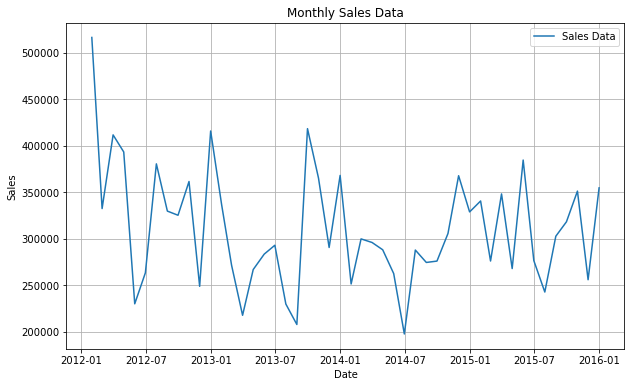

ADF Statistic: -7.051210351232603
p-value: 5.520440777337416e-10
The data is stationary.
ADF Statistic: -5.7833011153451785
p-value: 5.066787310168259e-07
The data is stationary.


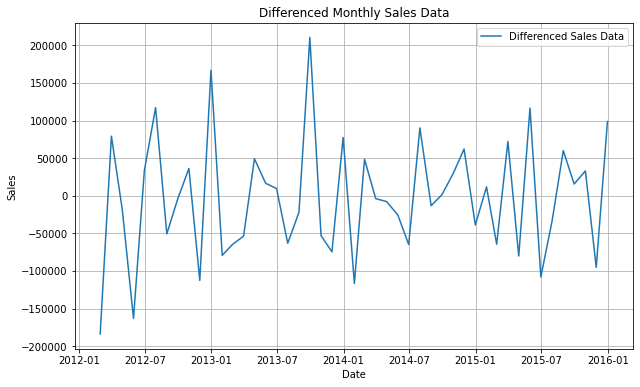

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -445.234
Date:                            Fri, 10 Jan 2025   AIC                            900.467
Time:                                    19:41:41   BIC                            908.244
Sample:                                01-31-2012   HQIC                           903.152
                                     - 12-31-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2980      0.427      0.698      0.485      -0.539       1.135
ma.L1         -0.6450      0.301   

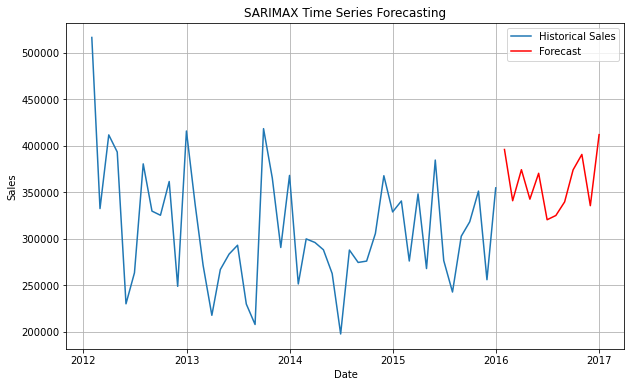

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller


# Preprocess Data
# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Aggregate Sales by Month
df = df.groupby(pd.Grouper(key='Order Date', freq='M')).sum()  # Monthly aggregation
sales_data = df['Sales']

# Plot the Time Series Data
plt.figure(figsize=(10, 6))
plt.plot(sales_data, label="Sales Data")
plt.title("Monthly Sales Data")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()

# Check Stationarity
def check_stationarity(ts):
    result = adfuller(ts.dropna())
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] <= 0.05:
        print("The data is stationary.")
    else:
        print("The data is not stationary.")

check_stationarity(sales_data)

# Differencing if Non-Stationary
sales_data_diff = sales_data.diff().dropna()
check_stationarity(sales_data_diff)

# Plot Differenced Data
plt.figure(figsize=(10, 6))
plt.plot(sales_data_diff, label="Differenced Sales Data")
plt.title("Differenced Monthly Sales Data")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()

# Fit SARIMAX Model
model = SARIMAX(sales_data, 
                order=(1, 1, 1),  # ARIMA (p, d, q)
                seasonal_order=(1, 1, 1, 12))  # Seasonal ARIMA (P, D, Q, s)
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Forecasting
forecast_steps = 12  # Forecast for the next 12 months
forecast = model_fit.forecast(steps=forecast_steps)

# Plot Forecast
forecast_index = pd.date_range(start=sales_data.index[-1], periods=forecast_steps + 1, freq='M')[1:]
forecast_series = pd.Series(forecast, index=forecast_index)

plt.figure(figsize=(10, 6))
plt.plot(sales_data, label='Historical Sales')
plt.plot(forecast_series, label='Forecast', color='red')
plt.title("SARIMAX Time Series Forecasting")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()
